In [5]:
import os, re, math, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Dict, Callable, Any, Tuple
from collections import defaultdict

In [6]:
# ЗАДАЧА 1(Файл)
students_path = "students.txt"

if not os.path.exists(students_path):
    sample = """Иван Иванов;ЗПИбд-01-24;5,5,4,5
Петр Петров;ЗПИбд-01-24;4,4,5
Мария Смирнова;ЗПИбд-02-24;5,5,5
Анна Кузнецова;ЗПИбд-02-24;4,5,4,5
"""
    with open(students_path, "w", encoding="utf-8") as f:
        f.write(sample)

print("students.txt OK:", os.path.exists(students_path))

students.txt OK: True


In [7]:
# ЗАДАЧА 1
@dataclass
class Student:
    name: str
    group: str
    grades: List[float]

    def average_grade(self) -> float:
        return sum(self.grades) / len(self.grades) if self.grades else 0.0

    def is_excellent(self) -> bool:
        return self.average_grade() >= 4.5


def parse_student_line(line: str) -> Student:
    name, group, grades_str = line.strip().split(";")
    grades = [float(x.strip()) for x in grades_str.split(",") if x.strip()]
    return Student(name=name.strip(), group=group.strip(), grades=grades)


students: List[Student] = []
with open("students.txt", "r", encoding="utf-8") as f:
    for i, line in enumerate(f, start=1):
        line = line.strip()
        if not line:
            continue
        try:
            students.append(parse_student_line(line))
        except Exception as e:
            print(f"Строка {i} пропущена: {e}")

with open("excellent_students.txt", "w", encoding="utf-8") as f:
    for s in students:
        if s.is_excellent():
            f.write(f"{s.name} - {s.group}\n")

group_to_grades: Dict[str, List[float]] = defaultdict(list)
for s in students:
    group_to_grades[s.group].extend(s.grades)

print("Средний балл по группам:")
for grp in sorted(group_to_grades):
    g = group_to_grades[grp]
    print(f"{grp}: {sum(g)/len(g):.2f}")

print("\nexcellent_students.txt создан.")


Средний балл по группам:
ЗПИбд-01-24: 4.57
ЗПИбд-02-24: 4.71

excellent_students.txt создан.


In [8]:
# ЗАДАЧА 2
log_text = """
2026-01-12 09:48:27 INFO  Connecting to ResourceManager at /192.168.34.2:8032
2026-01-12 09:48:28 WARN  User ADMIN logged in from 10.0.0.5
2026-01-12 09:50:01 ERROR INVALID TOKEN FOR USER ROOT
Contact: support@company.com, admin@site.org
Ping 8.8.8.8 OK
"""

ipv4_pattern = re.compile(r"\b(?:(?:25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)\.){3}(?:25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)\b")
timestamp_pattern = re.compile(r"\b\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\b")
uppercase_word_pattern = re.compile(r"\b[A-Z]{2,}\b")
email_pattern = re.compile(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b")

ipv4s = ipv4_pattern.findall(log_text)
timestamps = timestamp_pattern.findall(log_text)
upper_words = uppercase_word_pattern.findall(log_text)
masked_log = email_pattern.sub("[EMAIL PROTECTED]", log_text)

print("IPv4:", ipv4s)
print("Timestamps:", timestamps)
print("UPPERCASE words:", upper_words)
print("\nMasked log:\n", masked_log)


IPv4: ['192.168.34.2', '10.0.0.5', '8.8.8.8']
Timestamps: ['2026-01-12 09:48:27', '2026-01-12 09:48:28', '2026-01-12 09:50:01']
UPPERCASE words: ['INFO', 'WARN', 'ADMIN', 'ERROR', 'INVALID', 'TOKEN', 'FOR', 'USER', 'ROOT', 'OK']

Masked log:
 
2026-01-12 09:48:27 INFO  Connecting to ResourceManager at /192.168.34.2:8032
2026-01-12 09:48:28 WARN  User ADMIN logged in from 10.0.0.5
2026-01-12 09:50:01 ERROR INVALID TOKEN FOR USER ROOT
Contact: [EMAIL PROTECTED], [EMAIL PROTECTED]
Ping 8.8.8.8 OK



  Товар   Цена  Количество  Общая_стоимость
0  Кофе  250.0           2            500.0
1   Чай  125.0           5            625.0
3   Сок  120.0           3            360.0
5  Кофе  125.0           7            875.0
6   Сок  130.0          10           1300.0
7   Чай   95.0           1             95.0

Выручка:
 Товар
Сок     1660.0
Кофе    1375.0
Чай      720.0
Name: Общая_стоимость, dtype: float64


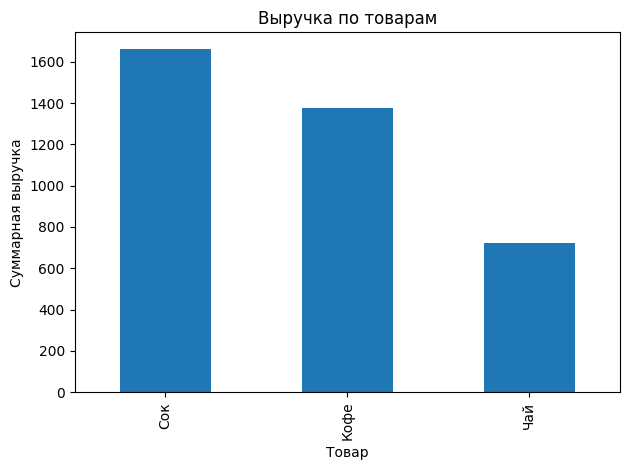

In [9]:
# ЗАДАЧА 3
data = {
    "Товар": ["Кофе", "Чай", "Кофе", "Сок", "Чай", "Кофе", "Сок", "Чай"],
    "Цена": [250.0, np.nan, 260.0, 120.0, 90.0, np.nan, 130.0, 95.0],
    "Количество": [2, 5, 1500, 3, 0, 7, 10, 1],
}
df = pd.DataFrame(data)

df["Цена"] = df["Цена"].fillna(df["Цена"].median(skipna=True))
df = df[(df["Количество"] >= 1) & (df["Количество"] <= 1000)].copy()
df["Общая_стоимость"] = df["Цена"] * df["Количество"]

revenue = df.groupby("Товар")["Общая_стоимость"].sum().sort_values(ascending=False)

print(df)
print("\nВыручка:\n", revenue)

revenue.plot(kind="bar")
plt.title("Выручка по товарам")
plt.xlabel("Товар")
plt.ylabel("Суммарная выручка")
plt.tight_layout()
plt.show()


In [10]:
# ЗАДАЧА 4
rng = np.random.default_rng()

A = rng.integers(1, 11, size=(5, 5))
B = rng.integers(1, 11, size=(5, 5))

print("A:\n", A)
print("\nB:\n", B)

print("\nA*B (поэлементно):\n", A * B)
print("\nA@B (матрично):\n", A @ B)

detA = np.linalg.det(A)
print("\ndet(A):", detA)

print("\nB^T:\n", B.T)

try:
    invA = np.linalg.inv(A)
    print("\nA^{-1}:\n", invA)
except np.linalg.LinAlgError:
    invA = None
    print("\nA необратима.")

C = A.sum(axis=1).reshape(-1, 1)
try:
    x = np.linalg.solve(A, C)
    print("\nC:\n", C)
    print("\nx:\n", x)
except np.linalg.LinAlgError:
    print("\nСистему решить нельзя (A вырожденная).")


A:
 [[ 4  5  3  3  1]
 [ 3  2  8  7  2]
 [ 9  4  3  4 10]
 [ 2 10  7  3  9]
 [ 1  7  1  1  3]]

B:
 [[ 6  1  7 10  7]
 [ 7 10  4  2  1]
 [ 8  5  7  3  1]
 [10 10  8  5 10]
 [10 10  9 10  2]]

A*B (поэлементно):
 [[ 24   5  21  30   7]
 [ 21  20  32  14   2]
 [ 72  20  21  12  10]
 [ 20 100  56  15  90]
 [ 10  70   9  10   6]]

A@B (матрично):
 [[123 109 102  84  68]
 [186 153 159 113 105]
 [246 204 222 227 130]
 [258 257 208 166  79]
 [103 116  77  62  31]]

det(A): -5359.000000000003

B^T:
 [[ 6  7  8 10 10]
 [ 1 10  5 10 10]
 [ 7  4  7  8  9]
 [10  2  3  5 10]
 [ 7  1  1 10  2]]

A^{-1}:
 [[ 0.31330472 -0.13584624  0.0373204   0.04329166 -0.26814704]
 [ 0.07296137 -0.02687068 -0.03657399 -0.00242583  0.1227841 ]
 [ 0.27896996 -0.10785594 -0.09124837  0.25415189 -0.47938048]
 [-0.40772532  0.32151521  0.07650681 -0.3112521   0.60029856]
 [-0.23175966  0.03676059  0.07781302  0.01026311  0.09591342]]

C:
 [[16]
 [22]
 [30]
 [31]
 [13]]

x:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [11]:
# ЗАДАЧА 5
def safe_apply(func: Callable[[Any], Any], data: List[Any]) -> Tuple[List[Any], List[Tuple[Any, Exception]]]:
    results = []
    errors = []
    for el in data:
        try:
            results.append(func(el))
        except Exception as e:
            errors.append((el, e))
    return results, errors

data_list = ["4", "16", "text", "-25", "9.0"]
sqrt_lambda = lambda x: math.sqrt(float(x))

results, errors = safe_apply(sqrt_lambda, data_list)

print("results:", results)
print("errors:")
for el, e in errors:
    print(f"  {el!r} -> {type(e).__name__}: {e}")


results: [2.0, 4.0, 3.0]
errors:
  'text' -> ValueError: could not convert string to float: 'text'
  '-25' -> ValueError: math domain error


In [12]:
# ЗАДАЧА 6
class Timer:
    def __enter__(self):
        self.t0 = time.perf_counter()
        return self
    def __exit__(self, exc_type, exc, tb):
        print(f"Время выполнения: {time.perf_counter() - self.t0:.6f} сек")
        return False

with Timer():
    A = rng.integers(1, 11, size=(5, 5))
    B = rng.integers(1, 11, size=(5, 5))
    _ = A * B
    _ = A @ B
    _ = np.linalg.det(A)
    _ = B.T
    try:
        _ = np.linalg.inv(A)
    except np.linalg.LinAlgError:
        pass
    C = A.sum(axis=1).reshape(-1, 1)
    try:
        _ = np.linalg.solve(A, C)
    except np.linalg.LinAlgError:
        pass


Время выполнения: 0.000419 сек
